Mean, Standard Deviation etc
                A           B           C           D
count  100.000000  100.000000  100.000000  100.000000
mean     9.236596    3.948334    1.725358    3.671684
std      3.735641    1.814489    1.930616    3.851701
min     -2.000000  -12.000000   -3.486007   -6.603392
25%      7.295927    3.535501    0.465168    1.096477
50%      8.962616    4.073027    1.864417    3.834762
75%     11.005948    4.532985    2.937909    6.097927
max     33.330000   10.000000    7.348428   14.852899
-----------------------
skew:
%d A    3.156644
B   -6.599453
C   -0.097869
D   -0.069839
dtype: float64
-----------------------
kurtosis:
 %d A    19.960229
B    62.309142
C     0.414781
D     0.397507
dtype: float64
-----------------------
correlation matrix(Pearson):
          A         B         C         D
A  1.000000  0.096204  0.190858  0.196849
B  0.096204  1.000000 -0.003563 -0.008434
C  0.190858 -0.003563  1.000000  0.999403
D  0.196849 -0.008434  0.999403  1.000000
-----

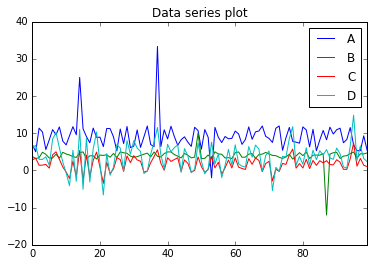

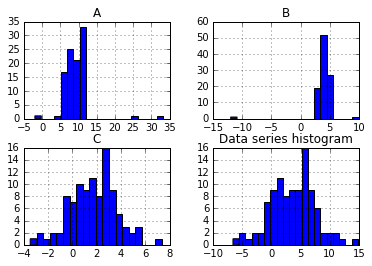

In [32]:
# Get moments, correlation

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dateutil

# Loading file into the dataframe
df = pd.read_csv('test_data.csv')

# Plot data series
df.plot()
plt.title('Data series plot')

# Plot histogram
df.hist(bins=20)
plt.title('Data series histogram')

#Normal Distribution Skewness: γ = 0
#Normal Distribution Kurtosis: k = 3

# Derive mean and standard deviation
print('Mean, Standard Deviation etc')
print(df.describe())
print('-----------------------')
print('skew:\n%d',df.skew())
print('-----------------------')
print('kurtosis:\n %d',df.kurtosis())
print('-----------------------')
print('correlation matrix(Pearson):')
print(df.corr())
print('-----------------------')
print('correlation matrix(Spearman):')
print(df.corr(method='spearman'))
print('correlation matrix(Kebdall):')
print(df.corr(method='kendall'))

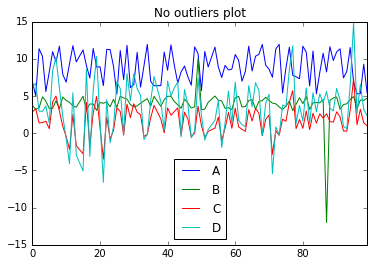

In [2]:
# Finding outliers

#df=pd.DataFrame({'Data':np.random.normal(size=200)})  #example dataset of normally distributed data. 
no_outliers_df = df.copy()[np.abs(df.A-df.A.mean())<=(3*df.A.std())]
#df = df[~(np.abs(df.A-df.A.mean())>(3*df.A.std()))]
no_outliers_df.plot()
plt.title('No outliers plot')

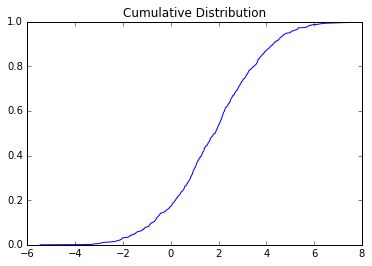

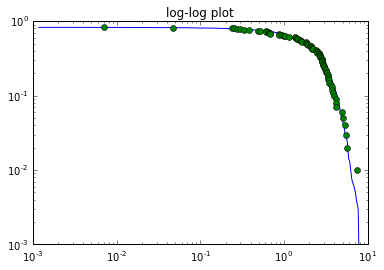

In [3]:
# cumulative distribution function
# hist, bin_edges = np.histogram(df.C,bins=30)
# cumsum = np.cumsum(hist)
#plt.loglog(cumsum)
# plt.plot(cumsum)
#plt.show()
#np.cumsum(df.C).plot()

import numpy as np
import matplotlib.pyplot as plt

N = 1000
Z = np.random.normal(size = N) * df.C.std() + df.C.mean()

#method 2
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)
plt.title('Cumulative Distribution')
plt.show()
X1 = np.sort(df.C)
F1 = np.array(range(len(df.C)))/float(len(df.C))
plt.loglog(X2,1-F2)
plt.loglog(X1,1-F1,'o')
plt.title('log-log plot')
plt.show()

# power law distribution has high kurtosis(146)


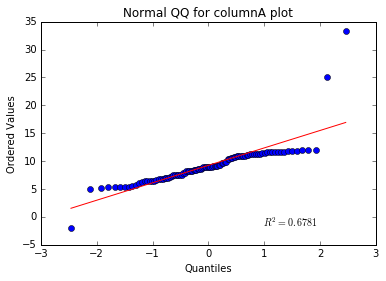

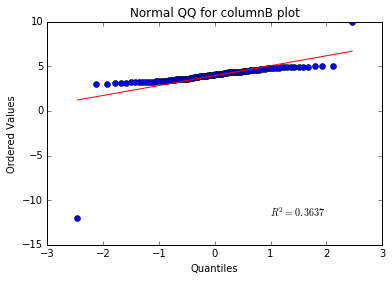

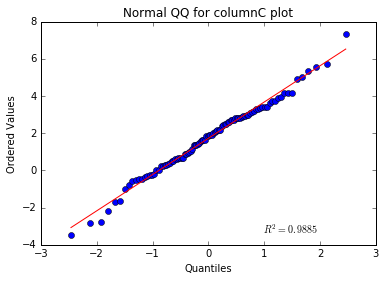

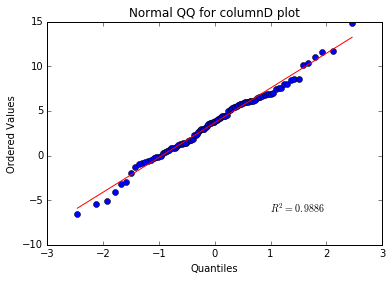

{'A': '7.31770309974e-26',
 'B': '3.13044222003e-11',
 'C': '7.51264270864e-97',
 'D': '4.58151607037e-97'}

In [4]:
# qqplot, checking with OLS against normal distribution
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

#qqplot(np.random.normal(size=200))

p_val_dict = {}
for col in df.columns:
    qqplot_res = stats.probplot(df[col], dist="norm", plot=plt, fit='True')
    plt.title("Normal QQ for column" +col+ " plot")
    plt.show()
    X = sm.add_constant(qqplot_res[0][0])
    model = sm.OLS(qqplot_res[0][1], X)
    results = model.fit()
    p_val_dict[col] = str(results.f_pvalue)
#http://docs.scipy.org/doc/scipy/reference/stats.html - distributions
p_val_dict


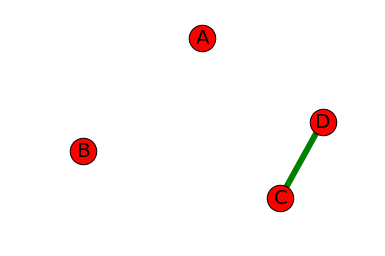

In [5]:
# networks

correlation_matrix = df.corr()

import networkx as nx
G = nx.Graph()
mask = np.ones(len(df.columns))
for i in df.columns:
    mask[list(df.columns).index(i)] = 0
    for j in df.columns:
        G.add_edge(i,j,weight=correlation_matrix.ix[i,j])
elarge_g=[(u,v) for (u,v,d) in G.edges(data=True) if abs(d['weight']) > 0.5 and d['weight']>0]
elarge_r=[(u,v) for (u,v,d) in G.edges(data=True) if abs(d['weight']) > 0.5 and d['weight']<0]
#esmall=[(u,v) for (u,v,d) in G.edges(data=True) if abs(d['weight']) <=0.5]
pos=nx.spring_layout(G)
# nodes
nx.draw_networkx_nodes(G,pos,node_size=700)
# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge_g,
                    width=6,edge_color="g")
nx.draw_networkx_edges(G,pos,edgelist=elarge_r,
                    width=6,alpha=0.5,edge_color='r',style='dashed')
# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')
plt.axis('off')
plt.show() # display

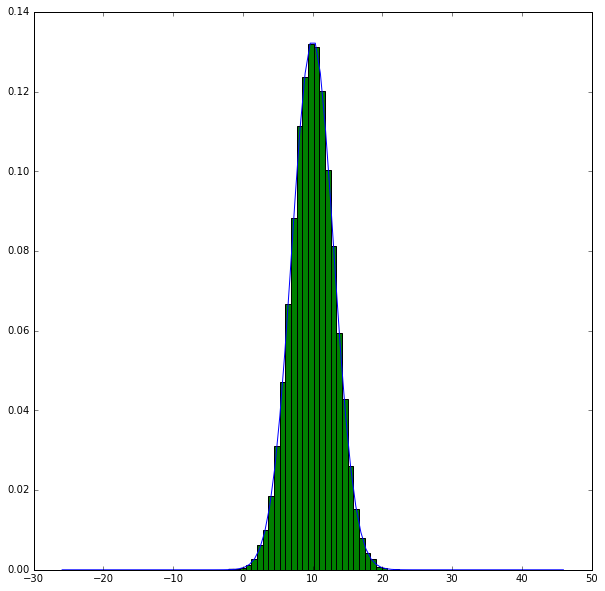

In [6]:
import numpy
import scipy.interpolate
import random
import matplotlib.pyplot as pyplot
import math
import matplotlib.mlab as mlab

a = np.random.normal(size=20000)*3+10
mean = a.mean()#df.A.mean()
variance = a.var()#df.A.var()
sigma = math.sqrt(variance)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
x = np.linspace(mean-4*variance,mean+4*variance, 100)
asd = ax.plot(x,mlab.normpdf(x,mean,sigma))
asd = ax.hist(a,bins=30,normed=True)

In [7]:

import scipy.stats as stats
stats.ttest_rel(df.C,stats.norm(1.72,1.93).rvs(len(df.C)))

Ttest_relResult(statistic=-0.25003536982094338, pvalue=0.8030781102570288)

In [92]:
# Reject the hypothesis that the distibution is normal if A is larger than the critical value

stats.anderson(df.C,'norm')  #if statistic is larger than 15, 10 5

AndersonResult(statistic=0.31638652421473523, critical_values=array([ 0.555,  0.632,  0.759,  0.885,  1.053]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [11]:
#covariance

df.cov()

,A,B,C,D
A,13.955017,0.652098,1.376488,2.832379
B,0.652098,3.292371,-0.012483,-0.058947
C,1.376488,-0.012483,3.727280,7.431722
D,2.832379,-0.058947,7.431722,14.835600


# Correlation matrix graph

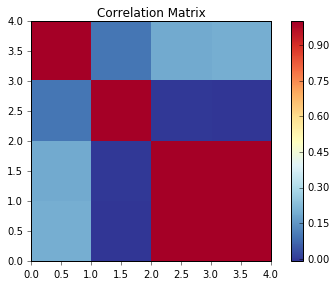

In [12]:

# build correlation matrix graph
import statsmodels.graphics as grph
grph.correlation.plot_corr(correlation_matrix);


In [13]:
from scipy import stats
slope,intercept,r_value,p_value,std_err = stats.linregress(df.C,df.D)
print('p_value',p_value)
print('r-squared',r_value**2) # describes 99.8% of variance

p_value 4.51666066578e-145
r-squared 0.998807338413


In [97]:
my_data = pd.read_csv('FSE250.csv')
my_data['log_ret'] = (np.log(my_data[' FSE250']) - np.log(my_data[' FSE250'].shift(1)))
log_ret = my_data['log_ret'].ix[1:]

# Use MLE to find alpha

In [65]:
#Use MLE to fina alpha

quantile_10 = log_ret.quantile(q=0.1)
quantile_90 = log_ret.quantile(q=0.9)

left_tail = log_ret[log_ret <= quantile_10]

import numpy as np
ln_left_tail = np.log(quantile_10/left_tail)
ln_left_tail.size
sum_ln = sum(ln_left_tail)
alpha1 = -(left_tail.size/sum_ln)
print('alpha left',alpha1)

right_tail = log_ret[log_ret >= quantile_90]
ln_right_tail = np.log(quantile_90/right_tail)
ln_right_tail.size
sum_ln = sum(ln_right_tail)
alpha2 = -(right_tail.size/sum_ln)
print('alpha right',alpha2)

alpha left 2.25301394634
alpha right 1.89769879656


alpha 5.17116289356


Calculating best minimal value for power law fit


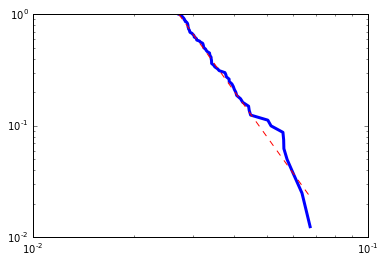

In [73]:
# Use powerlaw library
import powerlaw
fit = powerlaw.Fit(right_tail)
print('alpha',fit.power_law.alpha)
   
# Plot results
fig = fit.plot_ccdf(linewidth=3)
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--')
#fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--')
plt.show()

# Fitting power tails

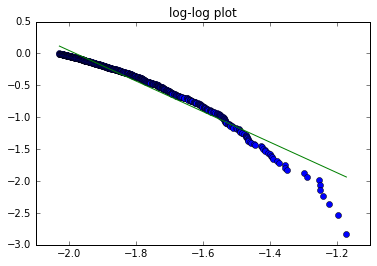

-2.39511044136
6818


In [82]:
#fit power tails
import math 
import sklearn.linear_model as LM
import scipy.stats as st
#import pylab
%matplotlib inline



# x, y = cumulative(data.C.values)
mean  = log_ret.mean()

# left_tail = log_ret[log_ret <= quantile_10]
# left_tail = mean - left_tail

right_tail = log_ret[log_ret >= quantile_90]

X1 = np.sort(right_tail.values)
F1 = np.array(range(len(right_tail.values)))/float(len(right_tail.values))
x = X1
y = 1-F1
logX = np.log10(x)
logY = np.log10(y)
slope, intercept, r_value, p_value, std_err = st.linregress(logX, logY)
predict_y = intercept + slope * logX
#pred_error = y - predict_y
#degrees_of_freedom = len(x) - 2
#residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)
#plt.loglog(x,y)
plt.plot(logX,logY,'o')
plt.plot(logX,predict_y)
plt.title('log-log plot')
plt.show()

print(slope)
print(len(my_data))

# Signifficance of correlation coefficients

In [98]:
stats.kendalltau(df.C, df.D).correlation
stats.kendalltau(df.C,df.D).pvalue

stats.spearmanr(df).correlation

stats.pearsonr(my_data.ix[:,0],my_data.ix[:,2] )[0]

-0.0032380155635314185

# Mutual Information


In [102]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(np.histogram(df.D)[0], np.histogram(df.C)[0])

1.0

# Entropy

In [107]:
stats.entropy(np.histogram(df.A)[0],np.histogram(df.D)[0])

1.1475076852387947